In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 

import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Hw - 1.1

In [6]:
a = np.array([[4,2,5], [12, 3, 9], [8, 0, 6], [10, 2, 8], [6, 1, 6], [8, 4, 2]])
data = pd.DataFrame(a, columns=['X1', 'X2', 'X3'])
data

,X1,X2,X3
0,4,2,5
1,12,3,9
2,8,0,6
3,10,2,8
4,6,1,6
5,8,4,2


In [13]:
print('평균 : ', data.mean())
print('분산 : ', data.var())

평균 :  X1    8.0
X2    2.0
X3    6.0
dtype: float64
분산 :  X1    8.0
X2    2.0
X3    6.0
dtype: float64


In [10]:
data.cov()   # 변수간 공분산 행렬(변수간 linear 관련 정도)

,X1,X2,X3
X1,8.0,1.2,4.0
X2,1.2,2.0,-1.0
X3,4.0,-1.0,6.0


In [14]:
data.corr()   # 표본 상관계수 행렬(공분산의 표준화!)

,X1,X2,X3
X1,1.00000,0.300000,0.577350
X2,0.30000,1.000000,-0.288675
X3,0.57735,-0.288675,1.000000


# Hw - 2.2

In [19]:
# data load
dt = pd.read_table('usair.dat', sep="\s+")
dt.head()

,SO2,TEMP,MANUF,POP,WIND,PRECIP,DAYS
0,10,70.3,213,582,6.0,7.05,36
1,13,61.0,91,132,8.2,48.52,100
2,12,56.7,453,716,8.7,20.66,67
3,17,51.9,454,515,9.0,12.95,86
4,56,49.1,412,158,9.0,43.37,127


In [72]:
dt.shape   # 41개의 영국 도시의 대기 오염 관련 요소를 모아놓은 데이터

(41, 7)

In [21]:
# (a)
print('평균 : ', dt.mean())
print('--------------------------')
print('분산 : ', dt.var())

평균 :  SO2        30.048780
TEMP       55.763415
MANUF     463.097561
POP       608.609756
WIND        9.443902
PRECIP     36.769024
DAYS      113.902439
dtype: float64
--------------------------
분산 :  SO2          550.947561
TEMP          52.239878
MANUF     317502.890244
POP       335371.893902
WIND           2.041024
PRECIP       138.569384
DAYS         702.590244
dtype: float64


In [23]:
# 표본 공분산 행렬 (변수별 선형 연관도)
dt.cov() 

,SO2,TEMP,MANUF,POP,WIND,PRECIP,DAYS
SO2,550.947561,-73.560671,8527.720122,6711.994512,3.175305,15.001799,229.929878
TEMP,-73.560671,52.239878,-773.971341,-262.349634,-3.611354,32.862988,-82.426159
MANUF,8527.720122,-773.971341,317502.890244,311718.814024,191.548110,-215.019902,1968.959756
POP,6711.994512,-262.349634,311718.814024,335371.893902,175.930061,-178.052890,645.985976
WIND,3.175305,-3.611354,191.548110,175.930061,2.041024,-0.218531,6.214390
PRECIP,15.001799,32.862988,-215.019902,-178.052890,-0.218531,138.569384,154.792902
DAYS,229.929878,-82.426159,1968.959756,645.985976,6.214390,154.792902,702.590244


In [24]:
#(b) 표본 상관계수 행렬
dt.corr()

,SO2,TEMP,MANUF,POP,WIND,PRECIP,DAYS
SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
TEMP,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
MANUF,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
POP,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
WIND,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
PRECIP,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
DAYS,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


In [26]:
dt.columns

Index(['SO2', 'TEMP', 'MANUF', 'POP', 'WIND', 'PRECIP', 'DAYS'], dtype='object')

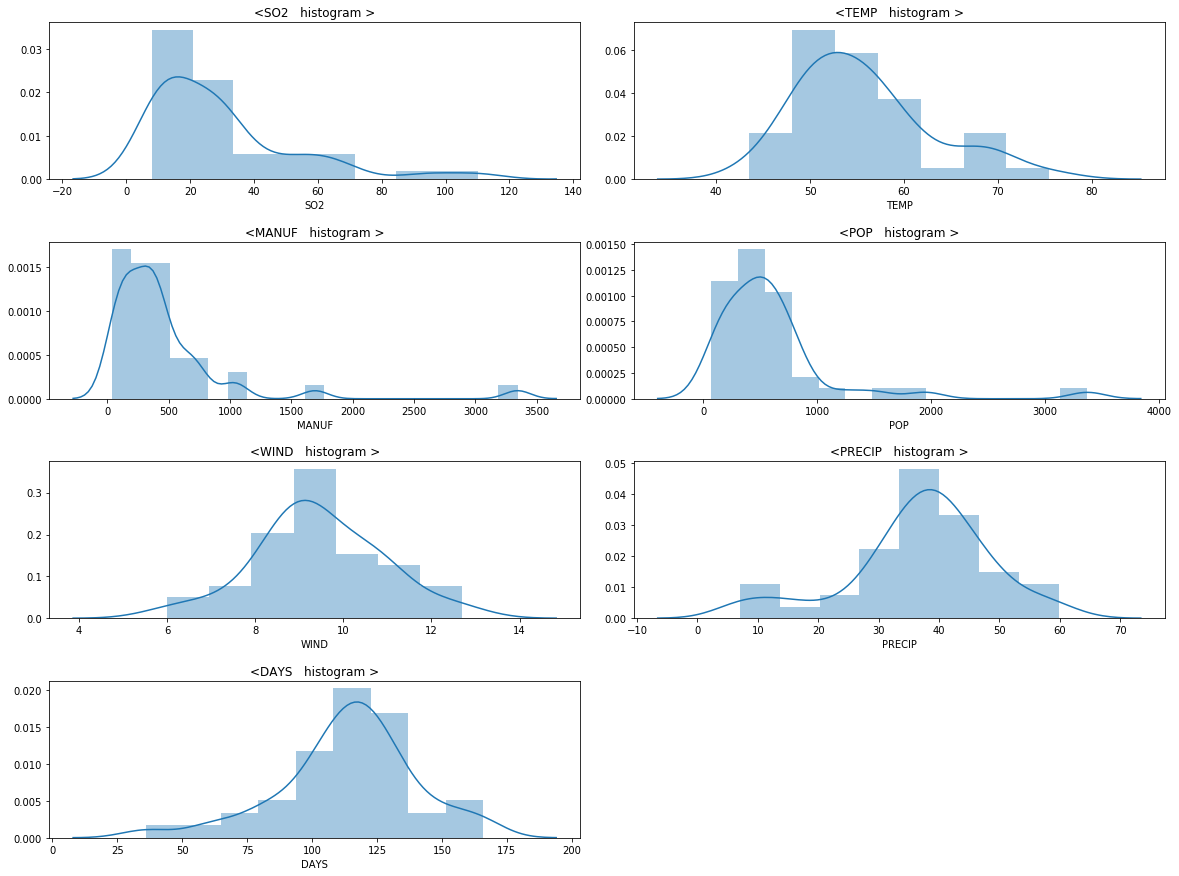

In [61]:
# 변수별 hist plot
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

for i, j in enumerate(dt.columns):
    fig.add_subplot(4,2,i+1)
    sns.distplot(dt[j])
    plt.title('<' +  j + '   histogram >')

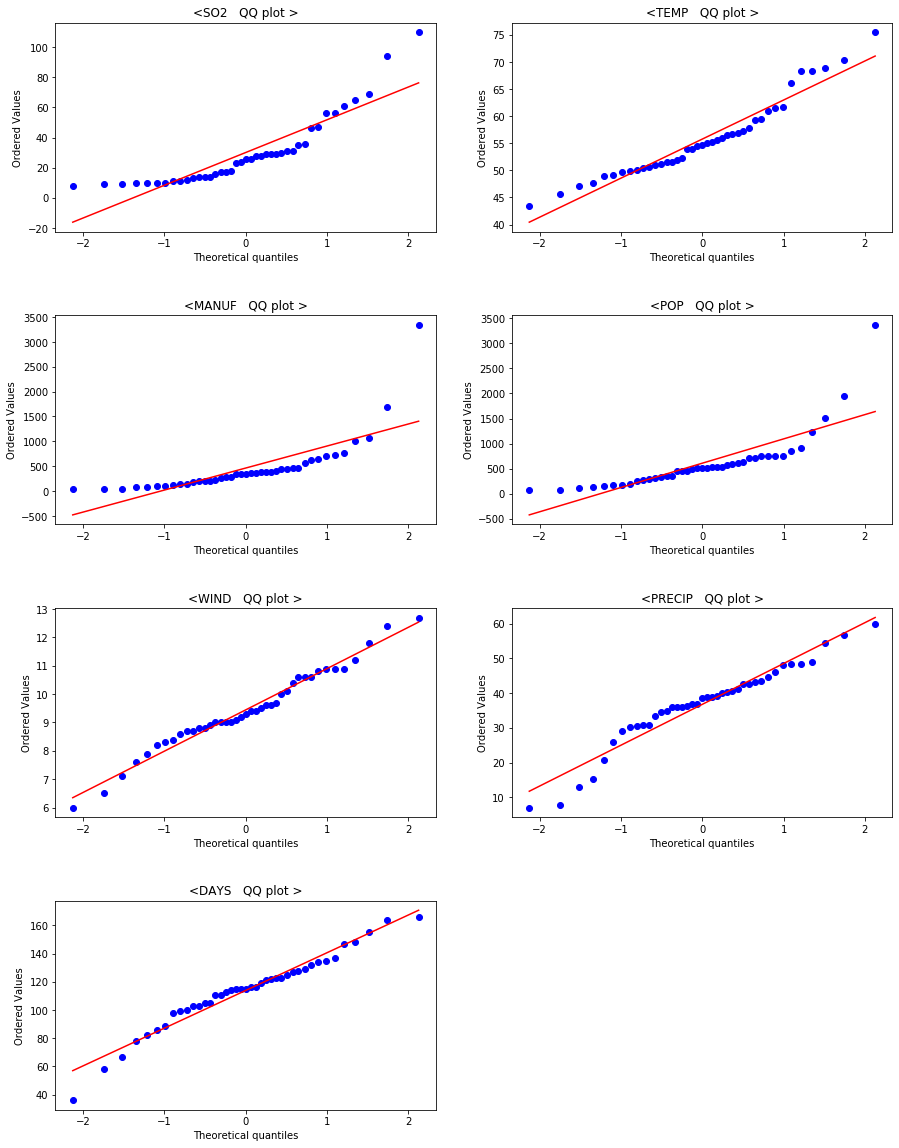

In [71]:
#(c) : 각 변수가 정규분포를 따르는지 확인하기 (with QQ plot)
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, j in enumerate(dt.columns):
    fig.add_subplot(4,2,i+1)
    stats.probplot(dt[j], plot=plt)
    plt.title('<' +  j + '   QQ plot >')

In [109]:
# (d) : Generalized Distance 구현(전체 mean에서 떨어진 정도)

from scipy.spatial import distance  # distance모듈 중 mahalanobis 모듈 사용
cov = dt.cov()  # Covariance Matrix
inv_cov = np.linalg.inv(cov)  # Inverse Cov matrix

# 전체 mean
x_bar = np.array([30.048780, 55.763415, 463.097561, 608.609756, 9.443902, 36.769024, 113.902439])

general_distance = []
for i in range(len(dt)):
    value = dt.iloc[i, :].values
    general_distance.append(distance.mahalanobis(value, x_bar, inv_cov))

general_distance = [x**2 for x in general_distance]  # 제곱으로 바꿔주기

# distance table
gd = pd.DataFrame(np.array(general_distance).reshape(1, 41), columns=range(len(dt)))
gd

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,20.25891,6.207429,4.53921,5.400965,7.760199,2.15683,1.5383,5.286583,14.277037,1.448871,...,3.573384,2.564959,6.368291,8.684844,4.43138,3.754731,2.492671,6.535345,7.888782,5.593825


In [121]:
gd2 = pd.DataFrame(np.array(general_distance).reshape(41, 1), columns=['city'])
gd2.head()

,city
0,20.258910
1,6.207429
2,4.539210
3,5.400965
4,7.760199


Text(0.5, 1.0, 'Chi-square probability plot')

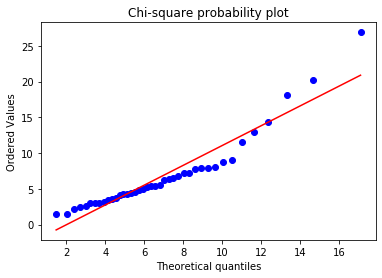

In [153]:
# (e) : 변수들이 다항 정규분포 따르는지 generalized distance로 판별하기
# gd가 chi2를 따르면 변수들은 다항 정규분포를 따른다고 가정

stats.probplot(gd2['city'], dist=stats.chi2, sparams=(7,), plot=plt)
plt.title('Chi-square probability plot')

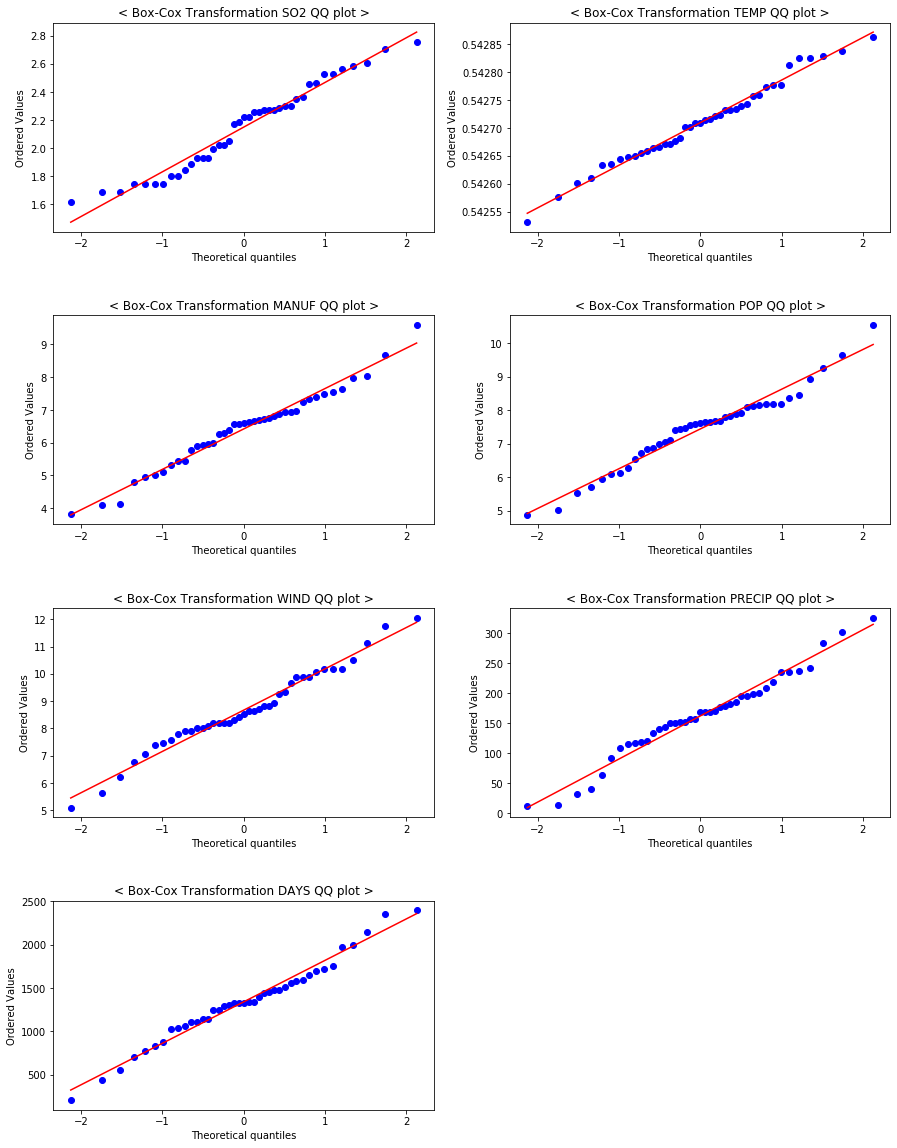

In [170]:
# (f) : BoxCox 변환을 통해 각각 변수들이 정규성을 가지는지 판단하기

fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, j in enumerate(dt.columns):
    fig.add_subplot(4,2,i+1)
    box_cox = stats.boxcox(dt[j])[0]
    stats.probplot(box_cox, plot=plt)
    plt.title('< Box-Cox Transformation ' +  j + ' QQ plot >')

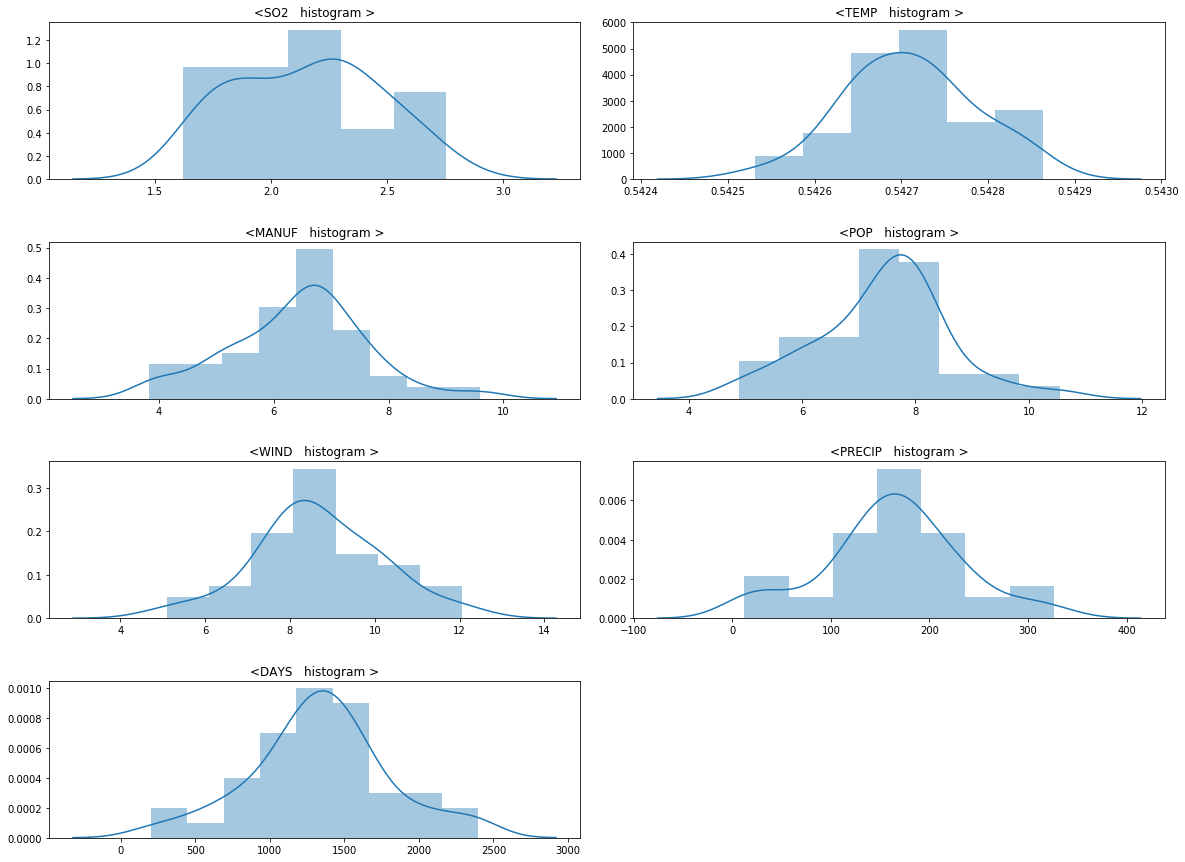

In [171]:
# 변수별 hist plot
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

for i, j in enumerate(dt.columns):
    fig.add_subplot(4,2,i+1)
    box_cox = stats.boxcox(dt[j])[0]
    sns.distplot(box_cox)
    plt.title('<' +  j + '   histogram >')